In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_csv('E:\My Training -AI&ML\Bitcoin_5_22_2025-7_23_2025_historical_data_coinmarketcap.csv', sep=';')

In [35]:
print("Original Data:\n", df.head())

# Step 3: Convert timestamp to datetime and extract date features
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Remove rows with invalid timestamps
df = df.dropna(subset=['timestamp'])


Original Data:
                    timeOpen                 timeClose  \
0  2025-07-21T00:00:00.000Z  2025-07-21T23:59:59.999Z   
1  2025-07-20T00:00:00.000Z  2025-07-20T23:59:59.999Z   
2  2025-07-19T00:00:00.000Z  2025-07-19T23:59:59.999Z   
3  2025-07-18T00:00:00.000Z  2025-07-18T23:59:59.999Z   
4  2025-07-17T00:00:00.000Z  2025-07-17T23:59:59.999Z   

                   timeHigh                   timeLow  name           open  \
0  2025-07-21T07:31:00.000Z  2025-07-21T00:24:00.000Z  2781  117306.466982   
1  2025-07-20T16:06:00.000Z  2025-07-20T22:19:00.000Z  2781  117944.109243   
2  2025-07-19T11:10:00.000Z  2025-07-19T21:27:00.000Z  2781  117998.127364   
3  2025-07-18T06:03:00.000Z  2025-07-18T20:39:00.000Z  2781  119284.111791   
4  2025-07-17T21:26:00.000Z  2025-07-17T12:31:00.000Z  2781  118738.506039   

            high            low          close        volume     marketCap  \
0  119671.564119  116584.400358  117439.535800  6.982009e+10  2.336270e+12   
1  118865.034065

In [36]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

In [37]:
df = df.drop(columns=['timestamp', 'name', 'timeOpen', 'timeClose', 'timeHigh', 'timeLow'], errors='ignore')


In [38]:
numeric_columns = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [39]:
df = df.dropna()

In [40]:
X = df.drop(columns=['close'])  # Features
y = df['close']  

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [43]:
print("\nModel Trained Successfully!")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Predicted values (first 5): {y_pred[:5]}")


Model Trained Successfully!
Mean Squared Error: 77.21
Predicted values (first 5): [117433.11656985 118739.84438423 105549.94618477 104397.39750057
 108950.21709626]


In [44]:
# part 2 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np


In [45]:
rf_model = RandomForestRegressor(random_state=42)

In [46]:
cv_rmse = cross_val_score(rf_model, X_train, y_train, cv=5,
                          scoring='neg_root_mean_squared_error')
print("Cross-validation RMSE (before tuning):", -cv_rmse.mean())
cv_rmse

Cross-validation RMSE (before tuning): 600.0526146045182


array([-604.15240465, -365.19090836, -890.50779079, -217.17717407,
       -923.23479516])

In [47]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [48]:
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)
best_rf

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 828.6052730395769


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# part 3
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [50]:
y_pred = best_rf.predict(X_test)

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"\nTest MAE: {mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Test MAE: 351.03
Test MSE: 367678.93
Test RMSE: 606.37
R² Score: 0.9852


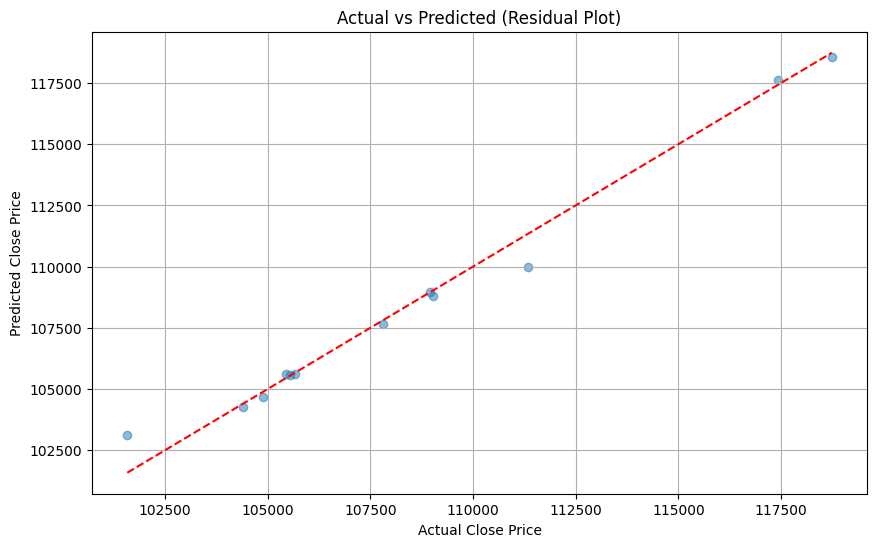

In [53]:
# Residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted (Residual Plot)')
plt.grid(True)
plt.show()

In [54]:
# part 4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [55]:
# Redefine numeric features
numeric_features = X_train.columns.tolist()

In [56]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_rf)])
pipeline.fit(X_train, y_train)
preprocessor


,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [57]:
full_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
full_pipeline

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [58]:
# Hyperparameter tuning with pipeline
param_grid_pipeline = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5]
}

grid_pipeline = GridSearchCV(
    full_pipeline,
    param_grid=param_grid_pipeline,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_pipeline.fit(X_train, y_train)

print("Best Pipeline Parameters:", grid_pipeline.best_params_)
best_pipeline_model = grid_pipeline.best_estimator_

# Save pipeline
import joblib
joblib.dump(best_pipeline_model, 'bitcoin_price_pipeline.joblib')

Best Pipeline Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


['bitcoin_price_pipeline.joblib']